In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import xgboost as xgb
import re

In [27]:
# Load dataset (Ensure you update the path if running locally)
file_path = "/content/reg_cars_selling.csv"
df = pd.read_csv(file_path)

In [28]:
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

In [29]:
df.tail()

name  year  selling_price  km_driven    fuel  \
8123       Hyundai i20 Magna  2013         320000     110000  Petrol   
8124   Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125  Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126         Tata Indigo CR4  2013         290000      25000  Diesel   
8127         Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage   engine  \
8123  Individual       Manual           First Owner   18.5 kmpl  1197 CC   
8124  Individual       Manual  Fourth & Above Owner   16.8 kmpl  1493 CC   
8125  Individual       Manual           First Owner   19.3 kmpl  1248 CC   
8126  Individual       Manual           First Owner  23.57 kmpl  1396 CC   
8127  Individual       Manual           First Owner  23.57 kmpl  1396 CC   

      max_power                     torque  seats  
8123  82.85 bhp           113.7Nm@ 4000rpm    5.0  
8124    110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
8125   73.9 bhp             190Nm@ 2000rpm    5.0  
8126     70 bhp        140Nm@ 1800-3000rpm    5.0  
8127     70 bhp        140Nm@ 1800-3000rpm    5.0

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [31]:
df.describe()

year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [32]:
print("Dataset Shape:", df.shape)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nData Types:")
print(df.dtypes)
print("\nStatistical Summary:")
print(df.describe(include='all'))

Dataset Shape: (8128, 13)

Missing Values:
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

Data Types:
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

Statistical Summary:
                          name         year  selling_price     km_driven  \
count                     8128  8128.000000   8.128000e+03  8.128000e+03   
unique                    2058          NaN            NaN           NaN   
top     Maruti Swift Dzire VDI          NaN            NaN           

In [33]:
df = df.dropna(subset=['selling_price'])  # Remove rows with missing target

In [34]:
# Feature Engineering
def extract_numeric(column):
    # Convert the column to string type before using .str accessor
    return column.astype(str).str.extract('(\d+\.?\d*)').astype(float)

# Process mileage
df['mileage'] = extract_numeric(df['mileage'])

# Process engine
df['engine'] = extract_numeric(df['engine'])

# Process max_power
df['max_power'] = extract_numeric(df['max_power'])

# Process torque
def extract_torque(value):
    if pd.isna(value):
        return np.nan
    match = re.search(r'(\d+\.?\d*)\s*Nm', str(value))
    return float(match.group(1)) if match else np.nan

df['torque'] = df['torque'].apply(extract_torque)

In [35]:
print(df.head())

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  torque  \
0  Individual       Manual   First Owner    23.40  1248.0      74.00   190.0   
1  Individual       Manual  Second Owner    21.14  1498.0     103.52   250.0   
2  Individual       Manual   Third Owner    17.70  1497.0      78.00     NaN   
3  Individual       Manual   First Owner    23.00  1396.0      90.00     NaN   
4  Individual       Manual   First Owner    16.10  1298.0      88.20     NaN   

   seats  
0    5.0  
1    5.0  
2    5.0  
3    5.0  
4    5.0  


In [36]:
print(df.tail())

                        name  year  selling_price  km_driven    fuel  \
8123       Hyundai i20 Magna  2013         320000     110000  Petrol   
8124   Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125  Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126         Tata Indigo CR4  2013         290000      25000  Diesel   
8127         Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner  mileage  engine  \
8123  Individual       Manual           First Owner    18.50  1197.0   
8124  Individual       Manual  Fourth & Above Owner    16.80  1493.0   
8125  Individual       Manual           First Owner    19.30  1248.0   
8126  Individual       Manual           First Owner    23.57  1396.0   
8127  Individual       Manual           First Owner    23.57  1396.0   

      max_power  torque  seats  
8123      82.85   113.7    5.0  
8124     110.00     NaN    5.0  
8125      73.90   190.0    5.0  
81

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  torque         7133 non-null   float64
 12  seats          7907 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 825.6+ KB


In [38]:
df.describe()

year  selling_price     km_driven      mileage       engine  \
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000  7907.000000   
mean   2013.804011   6.382718e+05  6.981951e+04    19.418783  1458.625016   
std       4.044249   8.062534e+05  5.655055e+04     4.037145   503.916303   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.549990e+05  3.500000e+04    16.780000  1197.000000   
50%    2015.000000   4.500000e+05  6.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.750000e+05  9.800000e+04    22.320000  1582.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  
count  7912.000000  7133.000000  7907.000000  
mean     91.517919   178.010583     5.416719  
std      35.822499    92.582354     0.959588  
min       0.000000    48.000000     2.000000  
25%      68.050000   110.000000     5.000000  
50%      82.000000   171.000000     5.000000  
75%     102.000000   205.000000     5.000000  
max     400.000000   789.000000    14.000000

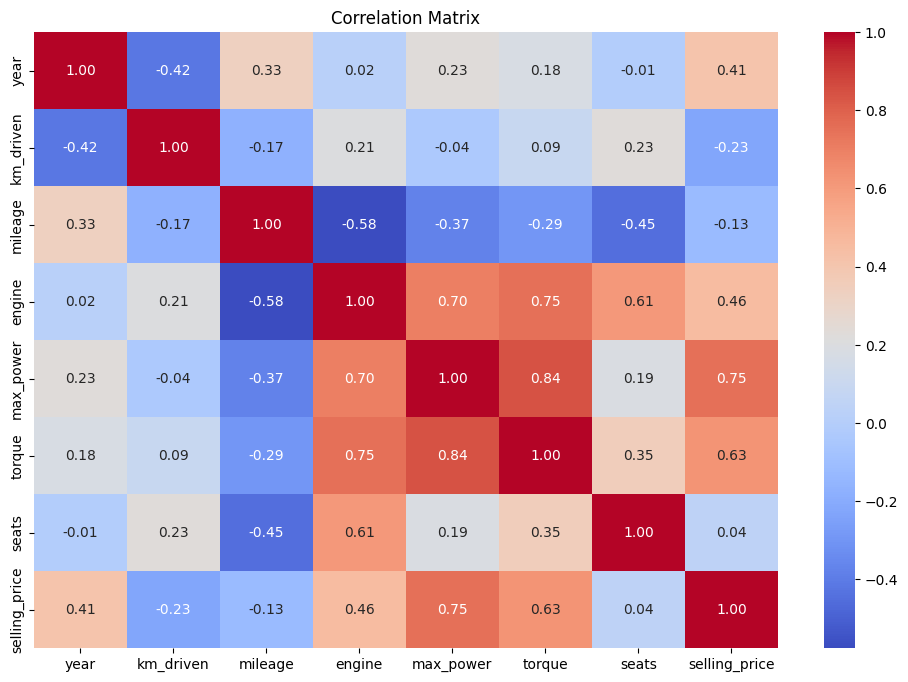

In [39]:
# Correlation Matrix
numeric_cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'selling_price']
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [40]:
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  torque  \
0  Individual       Manual   First Owner    23.40  1248.0      74.00   190.0   
1  Individual       Manual  Second Owner    21.14  1498.0     103.52   250.0   
2  Individual       Manual   Third Owner    17.70  1497.0      78.00     NaN   
3  Individual       Manual   First Owner    23.00  1396.0      90.00     NaN   
4  Individual       Manual   First Owner    16.10  1298.0      88.20     NaN   

   seats  
0    5.0  
1    5.0  
2    5.0  
3    5.0  
4    5.0

In [41]:
# Adding a new column 'Car Age' to the dataset
df['Car Age'] = 2025 - df['year']

# Displaying the first few rows to verify the new column
print(df[['year', 'Car Age']].head())


   year  Car Age
0  2014       11
1  2014       11
2  2006       19
3  2010       15
4  2007       18


In [42]:
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  torque  \
0  Individual       Manual   First Owner    23.40  1248.0      74.00   190.0   
1  Individual       Manual  Second Owner    21.14  1498.0     103.52   250.0   
2  Individual       Manual   Third Owner    17.70  1497.0      78.00     NaN   
3  Individual       Manual   First Owner    23.00  1396.0      90.00     NaN   
4  Individual       Manual   First Owner    16.10  1298.0      88.20     NaN   

   seats  Car Age  
0    5.0       11  
1    5.0       11  
2    5.0       19  
3    5.0       15  
4    5.0       18

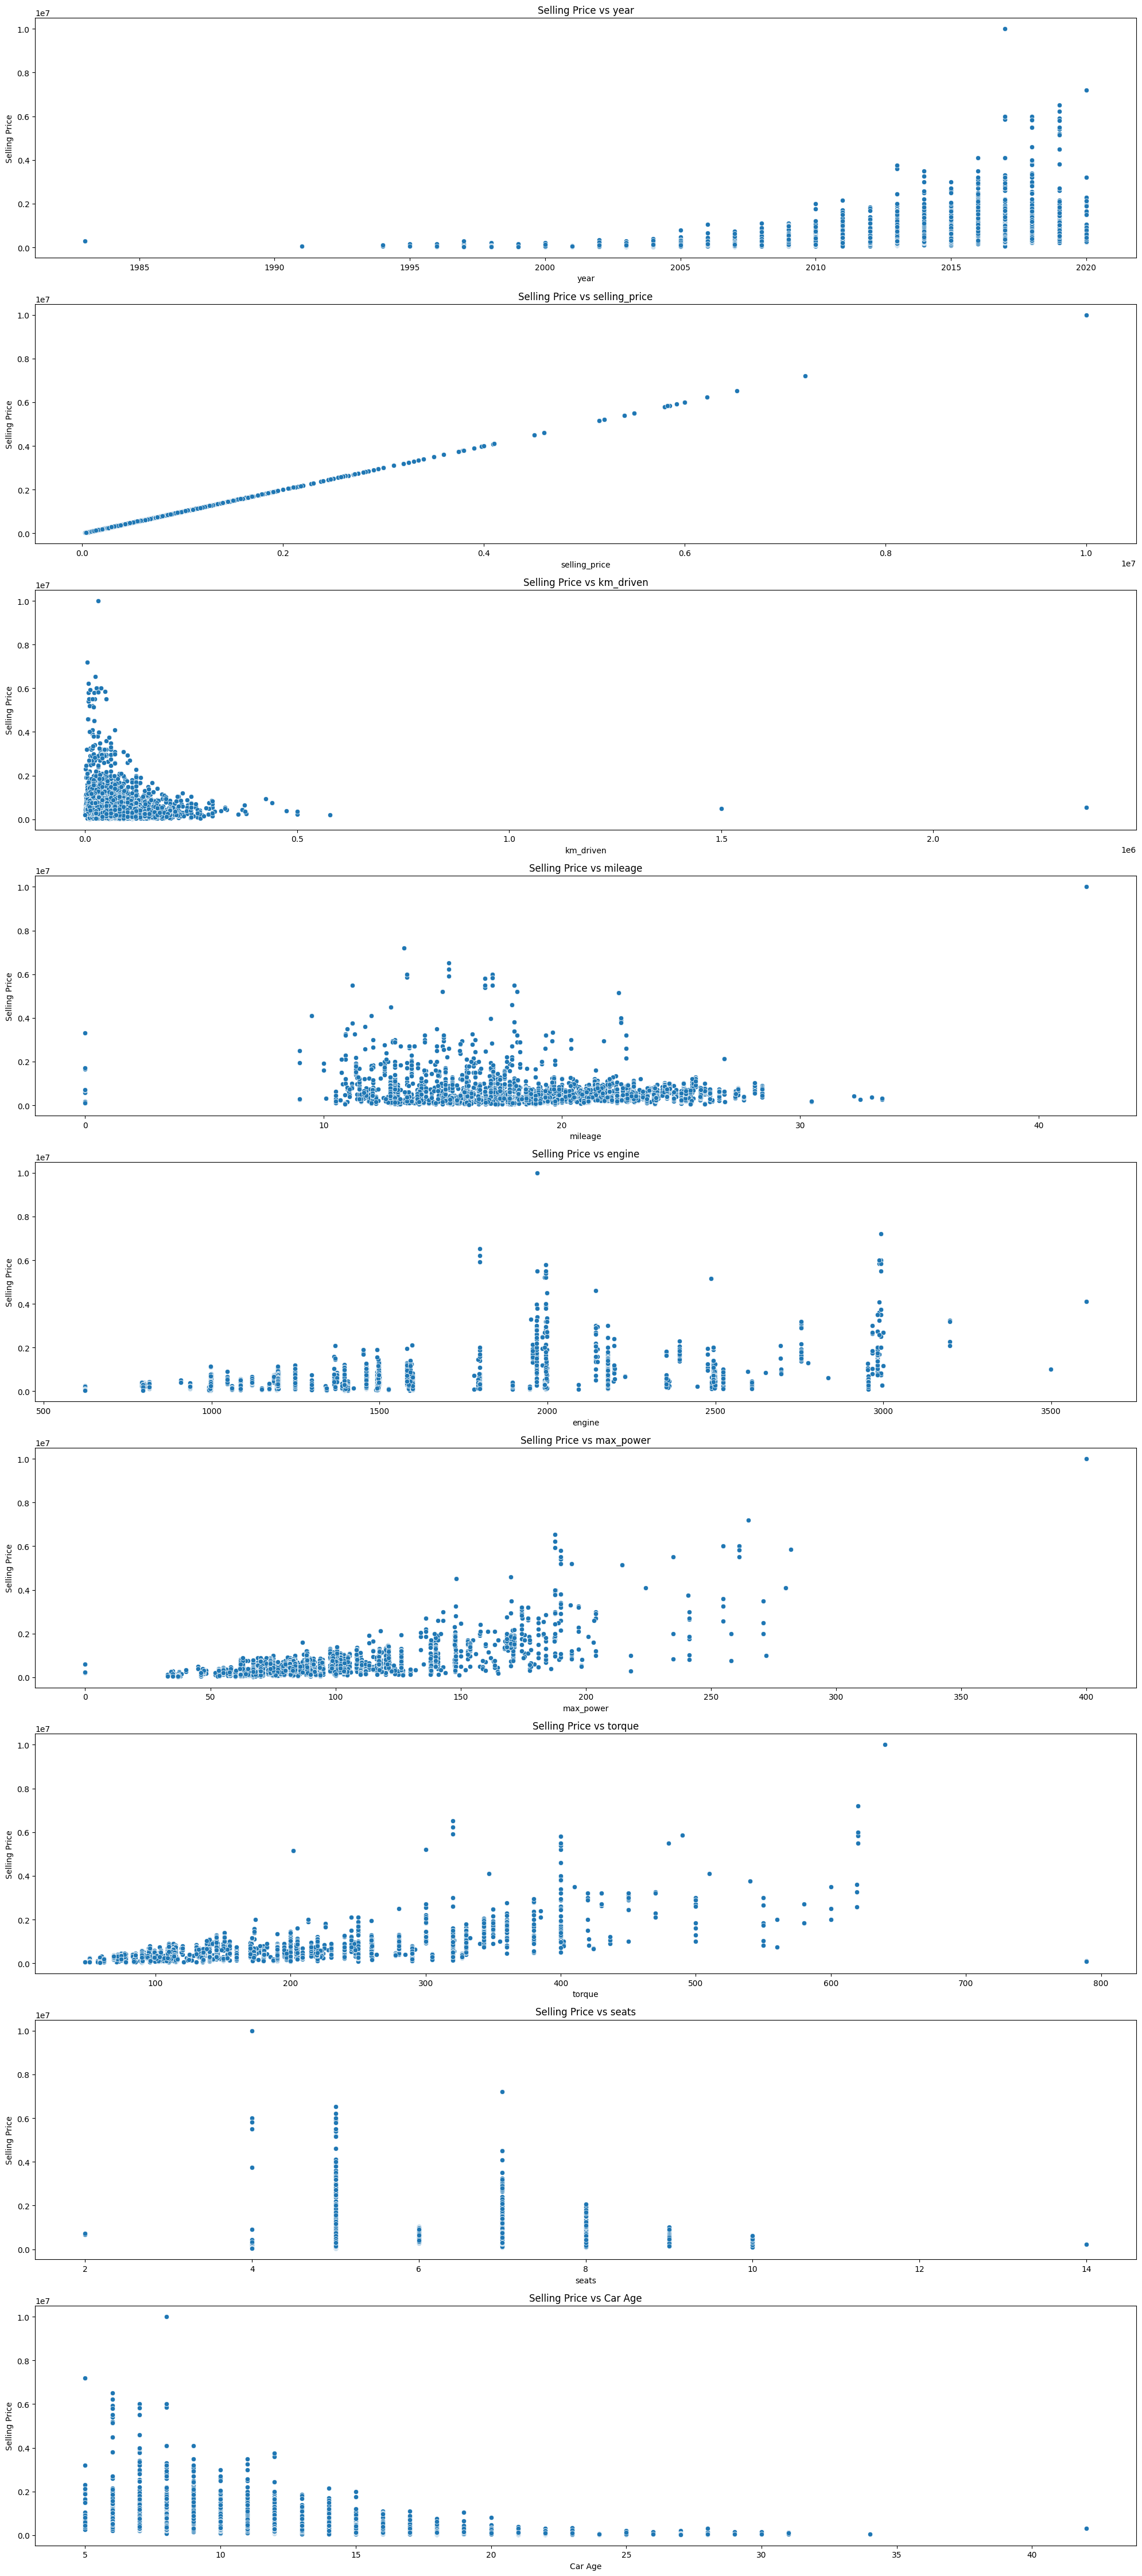

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting only numeric features for scatter plots
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

# Plotting scatter plots between each numeric feature and selling price
plt.figure(figsize=(20, 5 * len(numeric_features)))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(len(numeric_features), 1, i)
    sns.scatterplot(x=df[feature], y=df['selling_price'])
    plt.title(f'Selling Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Selling Price')

plt.tight_layout()
plt.show()

In [18]:
pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 70.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ab2336d323f8d6807ea407ec9de112bce92eea85a31e683d419a76ccea68aada
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [19]:
from ydata_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [44]:
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  torque  \
0  Individual       Manual   First Owner    23.40  1248.0      74.00   190.0   
1  Individual       Manual  Second Owner    21.14  1498.0     103.52   250.0   
2  Individual       Manual   Third Owner    17.70  1497.0      78.00     NaN   
3  Individual       Manual   First Owner    23.00  1396.0      90.00     NaN   
4  Individual       Manual   First Owner    16.10  1298.0      88.20     NaN   

   seats  Car Age  
0    5.0       11  
1    5.0       11  
2    5.0       19  
3    5.0       15  
4    5.0       18

In [45]:
df.drop(columns=['name'], inplace=True)

# Displaying the first few rows to verify the changes
print(df.head())

   year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  torque  seats  Car Age  
0   First Owner    23.40  1248.0      74.00   190.0    5.0       11  
1  Second Owner    21.14  1498.0     103.52   250.0    5.0       11  
2   Third Owner    17.70  1497.0      78.00     NaN    5.0       19  
3   First Owner    23.00  1396.0      90.00     NaN    5.0       15  
4   First Owner    16.10  1298.0      88.20     NaN    5.0       18  


In [46]:
# Define features and target
X = df.drop('selling_price', axis=1)
y = df['selling_price']

In [47]:
print(X.head())

   year  km_driven    fuel seller_type transmission         owner  mileage  \
0  2014     145500  Diesel  Individual       Manual   First Owner    23.40   
1  2014     120000  Diesel  Individual       Manual  Second Owner    21.14   
2  2006     140000  Petrol  Individual       Manual   Third Owner    17.70   
3  2010     127000  Diesel  Individual       Manual   First Owner    23.00   
4  2007     120000  Petrol  Individual       Manual   First Owner    16.10   

   engine  max_power  torque  seats  Car Age  
0  1248.0      74.00   190.0    5.0       11  
1  1498.0     103.52   250.0    5.0       11  
2  1497.0      78.00     NaN    5.0       19  
3  1396.0      90.00     NaN    5.0       15  
4  1298.0      88.20     NaN    5.0       18  


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   float64
 8   engine         7907 non-null   float64
 9   max_power      7912 non-null   float64
 10  torque         7133 non-null   float64
 11  seats          7907 non-null   float64
 12  Car Age        8128 non-null   int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 825.6+ KB


In [49]:
# Preprocessing pipeline
numeric_features = ['Car Age', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']

**Pipeline**: This allows you to chain multiple processing steps together for cleaner and more organized code.
**SimpleImputer(strategy='median'):** This fills missing values in numeric features with the median value of each column.
**StandardScaler**(): This standardizes features by removing the mean and scaling to unit variance, ensuring each numeric feature has a mean of 0 and a standard deviation of 1.
👉 **This pipeline ensures that numeric columns are cleaned and scaled properly.**

**SimpleImputer(strategy='most_frequent')**: This fills missing values in categorical columns with the most common (mode) value of each column.
**OneHotEncoder**(handle_unknown='ignore'): This converts categorical variables into binary (0/1) columns, creating one new column per category. The handle_unknown='ignore' ensures that if a new, unseen category appears during prediction, it won't cause an error.
👉 **This pipeline ensures that categorical features are cleaned and converted into a format suitable for machine learning models.**


In [69]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [72]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))]) # Changed LabelEncoder to OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [73]:
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [74]:
df.head()

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  torque  seats  Car Age  
0   First Owner    23.40  1248.0      74.00     190    5.0       11  
1  Second Owner    21.14  1498.0     103.52     250    5.0       11  
2   Third Owner    17.70  1497.0      78.00     178    5.0       19  
3   First Owner    23.00  1396.0      90.00     178    5.0       15  
4   First Owner    16.10  1298.0      88.20     178    5.0       18

In [76]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [78]:
df.head()

year  selling_price  km_driven  fuel  seller_type  transmission  owner  \
0  2014         450000     145500     1            1             1      0   
1  2014         370000     120000     1            1             1      2   
2  2006         158000     140000     3            1             1      4   
3  2010         225000     127000     1            1             1      0   
4  2007         130000     120000     3            1             1      0   

   mileage  engine  max_power  torque  seats  Car Age  
0    23.40  1248.0      74.00     190    5.0       11  
1    21.14  1498.0     103.52     250    5.0       11  
2    17.70  1497.0      78.00     178    5.0       19  
3    23.00  1396.0      90.00     178    5.0       15  
4    16.10  1298.0      88.20     178    5.0       18

In [79]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42)
}

In [81]:
# Train and evaluate models
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    results[name] = {
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }

In [82]:
df.head()

year  selling_price  km_driven  fuel  seller_type  transmission  owner  \
0  2014         450000     145500     1            1             1      0   
1  2014         370000     120000     1            1             1      2   
2  2006         158000     140000     3            1             1      4   
3  2010         225000     127000     1            1             1      0   
4  2007         130000     120000     3            1             1      0   

   mileage  engine  max_power  torque  seats  Car Age  
0    23.40  1248.0      74.00     190    5.0       11  
1    21.14  1498.0     103.52     250    5.0       11  
2    17.70  1497.0      78.00     178    5.0       19  
3    23.00  1396.0      90.00     178    5.0       15  
4    16.10  1298.0      88.20     178    5.0       18

In [83]:
# Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.sort_values(by='R2', ascending=False))


Model Performance Comparison:
                         R2            MAE           RMSE
Random Forest      0.968943   69392.656323  142680.001237
Gradient Boosting  0.959460   90657.302339  163013.839898
XGBoost            0.956667   73474.320312  168535.497033
Decision Tree      0.909387   87286.691153  243711.460623
Linear Regression  0.691791  268650.164900  449473.121549


In [84]:
# Identify best model
best_model_name = results_df['R2'].idxmax()
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")
print(f"R-squared: {results_df.loc[best_model_name]['R2']:.4f}")


Best Model: Random Forest
R-squared: 0.9689


**My Best Model seems to be the Random Forest Regressor**

In [85]:

from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'model__n_estimators': [50, 100, 200],  # Example for RandomForestRegressor
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    # Add more hyperparameters to tune for your chosen model
}

# Example using RandomForestRegressor
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=5, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)


# Print best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best R-squared score:", random_search.best_score_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)
print("R-squared on test set:", r2_best)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:46:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'model__n_estimators': 200, 'model__min_samples_split': 10, 'model__max_depth': None}
Best R-squared score: 0.9652833938598633
R-squared on test set: 0.955695390701294


In [86]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    # Add more hyperparameters to tune for your chosen model
}

# Example using RandomForestRegressor
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best R-squared score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)
print("R-squared on test set:", r2_best)


Best parameters: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Best R-squared score: 0.9654471635818481
R-squared on test set: 0.9566668272018433


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:53:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


In [88]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [89]:
import gradio as gr
import joblib

In [91]:
# Assuming 'best_model' is your trained model from previous cells
joblib.dump(best_model, 'model.pkl') # Save the model first

['model.pkl']

In [92]:
# Load the trained model
model = joblib.load('model.pkl')

# Define the prediction function
def predict_price(year, km_driven, fuel, seller_type, transmission, owner, mileage, engine, max_power, seats):
    input_data = pd.DataFrame([[
        year, km_driven, fuel, seller_type, transmission, owner, mileage, engine, max_power, seats
    ]], columns=['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'])
    prediction = model.predict(input_data)[0]
    return f"Estimated Selling Price: ₹{prediction:,.2f}"

In [93]:
# Gradio Interface
with gr.Blocks() as interface:
    # Add header with local image
    gr.Markdown("""
    # Car Selling Price Predictor
    ![Header Image](header-image.jpg)
    Enter the car details to predict its estimated selling price.
    """)

    # Inputs and Outputs
    year = gr.Number(label="Year")
    km_driven = gr.Number(label="Kilometers Driven")
    fuel = gr.Dropdown(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], label="Fuel Type")
    seller_type = gr.Dropdown(['Dealer', 'Individual', 'Trustmark Dealer'], label="Seller Type")
    transmission = gr.Dropdown(['Manual', 'Automatic'], label="Transmission")
    owner = gr.Dropdown(['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car'], label="Owner")
    mileage = gr.Number(label="Mileage (kmpl)")
    engine = gr.Number(label="Engine (CC)")
    max_power = gr.Number(label="Max Power (bhp)")
    seats = gr.Number(label="Seats")

    output = gr.Textbox(label="Prediction")

    # Button to trigger prediction
    submit_btn = gr.Button("Predict")
    submit_btn.click(fn=predict_price, inputs=[year, km_driven, fuel, seller_type, transmission, owner, mileage, engine, max_power, seats], outputs=output)

# Launch the app
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f52a4b469970aba0ff.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


THANK YOU *Eng.Mustafa Othman* for your great efforts and explanation during the course! you gave me the hope in being an AI Cloud Engineer in the future! I can't thank you enough!
Hassan Zaid